#### Aging DTI  DECISION TREE ON DTI DATA / Target Var. Group or JND or clusterN
using SFS / Kmeans and/or XGboost 
5 features !!


In [9]:
from sklearn.cluster import KMeans

import warnings

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as scs

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import xgboost as xgb

import warnings



nclust=2
dti_metric='FA'
CC=5

psychophy=0
fonctionalIHD=0
nfeatures=5
list_of_selfeatures=np.load('SavedFeaturesSelectedBackward20to2_CC'+str(CC)+'_'+dti_metric+'.npy',allow_pickle=True)

dataRaw = pd.read_csv('CC_'+str(CC) +'_'+dti_metric+'.csv', sep=",")
SubjectTable_imputed = pd.read_csv('Subject_imputed.csv', sep=",")
#SavedFeaturesSelected=np.load('SavedFeaturesSelected.npy',allow_pickle=True)

#SelectedFeat=SavedFeaturesSelected[0,CC-1]
SelectedFeat=(list_of_selfeatures[nfeatures])
print(SelectedFeat)


'CC_'+str(CC) +'_'+dti_metric+'.csv'

SubjectTable_imputedNp=SubjectTable_imputed.to_numpy()
JND_Group_only=SubjectTable_imputedNp[:,1]
JNDgroup=[]
for i in JND_Group_only:
     if i>np.median((np.fix(list(JND_Group_only)))):
         JNDgroup.append(0)
     else :
         JNDgroup.append(1)
         
SubjectTable_imputed["JND_group"]=JNDgroup




data=pd.concat([dataRaw.loc[:,SelectedFeat], SubjectTable_imputed], axis=1)
Y_group=data["group"] 
Y_JND=data["JND_group"] 
dataready=data.drop(['sex','age','group_Y', 'group_O', 'JND_group', 'group'], axis=1)

X_df=dataready 

if psychophy==0:
    X_df=X_df.drop(['JND_P',], axis=1)
if fonctionalIHD==0:
    X_df=X_df.drop(['IHD',], axis=1)

X_df

Index(['5', '54', '56', '68', '69'], dtype='object')


,5,54,56,68,69,FA_body,MD_body,AD_body,RD_body
0,0.385030,0.627046,0.637671,0.440229,0.439572,0.583124,0.000678,0.001200,0.000417
1,0.520208,0.583707,0.546879,0.430411,0.420380,0.613808,0.000638,0.001163,0.000375
2,0.456006,0.630876,0.638693,0.467464,0.470830,0.627866,0.000631,0.001173,0.000361
3,0.562367,0.548525,0.590335,0.469330,0.444272,0.596784,0.000665,0.001187,0.000404
4,0.428044,0.660587,0.681078,0.485445,0.473549,0.637038,0.000636,0.001197,0.000356
5,0.440978,0.527597,0.587200,0.555731,0.530340,0.578016,0.000675,0.001187,0.000419
6,0.416204,0.528201,0.549241,0.464874,0.430435,0.575703,0.000656,0.001149,0.000409
7,0.366808,0.501691,0.548443,0.498576,0.485205,0.621231,0.000630,0.001152,0.000369
8,0.383011,0.494570,0.513176,0.535784,0.533837,0.590530,0.000661,0.001185,0.000400
9,0.444171,0.619884,0.629618,0.484675,0.461069,0.609421,0.000669,0.001224,0.000392


2 clusters
[[-0.50399656 -0.97309002 -1.00217997  0.98397226  0.94094871 -0.95104972
   0.90996989  0.21318846  0.9784462 ]
 [ 0.22399847  0.43248445  0.44541332 -0.43732101 -0.41819942  0.42268876
  -0.40443106 -0.09475043 -0.43486498]]
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0
 0 1]


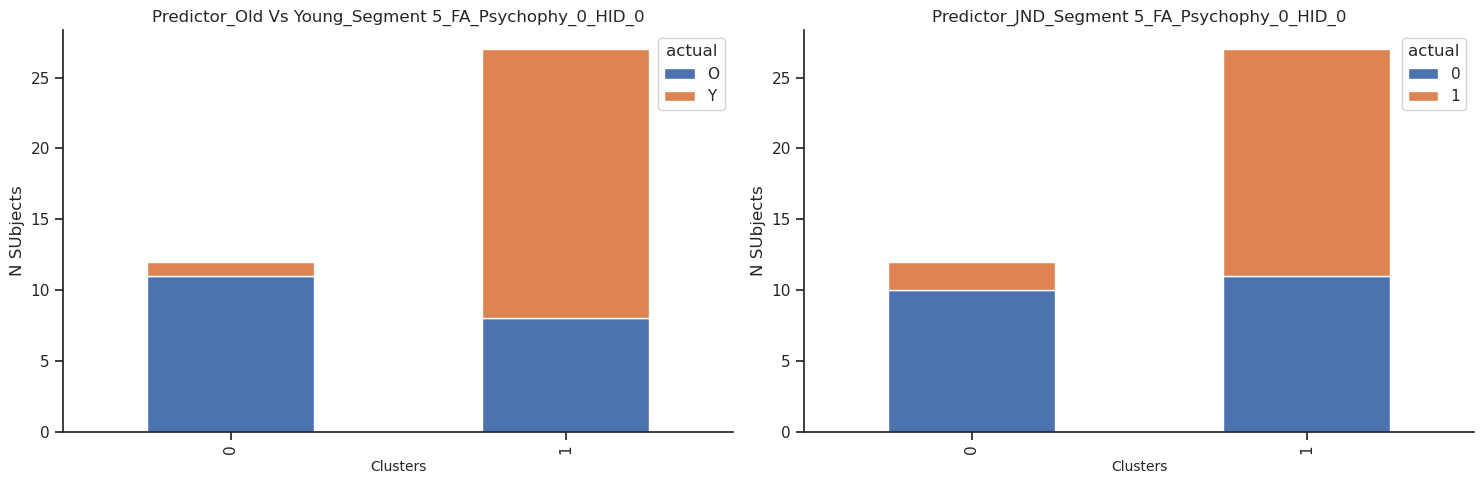

In [11]:
X_df.head()

#SCALING 
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X_df)
Xscaled_df = pd.DataFrame(Xscaled, columns=X_df.columns)

#KMEANS  
kmeans = KMeans(n_clusters=nclust, random_state=42).fit(Xscaled_df)
kmeans.labels_
CenterCluster=kmeans.cluster_centers_
labels_CC = kmeans.labels_
print(str(nclust)+' clusters')
print(CenterCluster)
print(labels_CC)




#AllSilScore,AllCalHar,Allinertia=[],[],[]

SilScore=[]
CalHar=[]
DavBouldin=[]
inertia=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(Xscaled_df)
    SilScore.append(silhouette_score(Xscaled_df, kmeans.fit_predict(Xscaled_df)))
    CalHar.append(calinski_harabasz_score(Xscaled_df, kmeans.labels_))
    # DavBouldin.append(davies_bouldin_score(X, labels))
    inertia.append(kmeans.inertia_)  # Inertie (cohésion)

#AllSilScore.append(SilScore)
#AllCalHar.append(CalHar)
#Allinertia.append(inertia)



K_range = range(2, 10)  
    
df = pd.DataFrame({'Silhouette Score': SilScore,'Inertia': inertia,
               'Cal.-Har. Index': CalHar,'N Cluster': K_range})
df.head
sns.set_theme(style="ticks")





SelectedFeat

f1=SelectedFeat[1]
f2=SelectedFeat[3]




import seaborn as sns



SubjectTable_imputed["group"]
data.head()


SubjectTable_imputed["cluster"]=labels_CC



### **Plot prediction of Age Groupe and JND from clusters**


if psychophy==1:
    predicteur_list=['Old Vs Young']
else :
    predicteur_list=['Old Vs Young','JND']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))#, sharey=True)

for predicteurID in range(len(predicteur_list)):
    
    predicteur_str=predicteur_list[predicteurID]
    
    if predicteur_str=='JND':
            predicteur=JNDgroup
    elif predicteur_str=='Old Vs Young':
            predicteur=SubjectTable_imputed["group"]

    if predicteurID==0:
        a=0
    elif predicteurID==1:
        a =1

    df_clusters = pd.DataFrame({
    'actual': predicteur, 
    'predicted': labels_CC   
    })
     
    df_clusters = df_clusters.sort_values(by='predicted')
    
    group_distribution = pd.crosstab(df_clusters['predicted'], df_clusters['actual'])
     
    group_distribution.plot(ax=axes[a],kind='bar', stacked=True)
    
    axes[a].set_xlabel("Clusters", fontsize=10)
    axes[a].set_ylabel("N SUbjects", fontsize=12)
    axes[a].set_title('Predictor_' + predicteur_str+ '_Segment ' + str(CC)  + '_' + dti_metric + '_Psychophy_'
                   + str(psychophy) + '_HID_' + str(fonctionalIHD), fontsize=12)
    axes[a].spines['top'].set_visible(False)
    axes[a].spines['right'].set_visible(False)

   
plt.tight_layout()
    

#plt.savefig('Segment_' + str(CC) + '_' + dti_metric  + '_ Psychophy_' + str(psychophy) + '_ HID_' + 
#            str(fonctionalIHD)+'.eps', format='eps', bbox_inches="tight")

plt.show()

df_clusters.head()
X=X_df

now that we have identify that X clusters based on best features were detected and good predictor of group and JNP, let's train a **DecisionTree** supervised to verify

In order to find the best parameter to the model, **to avoid overfitting I used a 2 different GridSearchCV**


### **HalvingGridSearchCV**

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



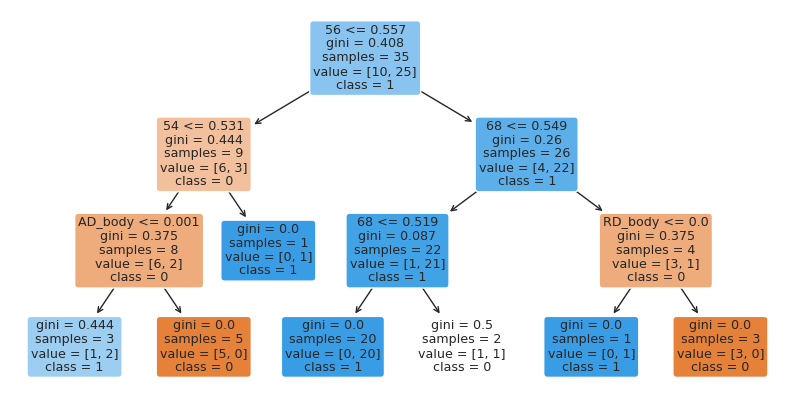

Confusion Matrix:
[[2 0]
 [0 2]]


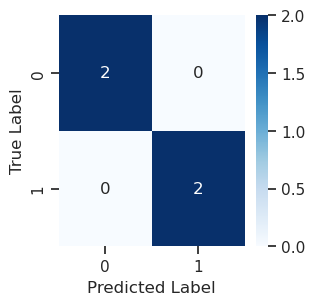

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Cross-Validation Accuracy Scores: [0.875 0.875 0.625 0.875 1.   ]
Mean CV Accuracy: 0.8500


Text(0.5, 1.0, 'Learning Curve')

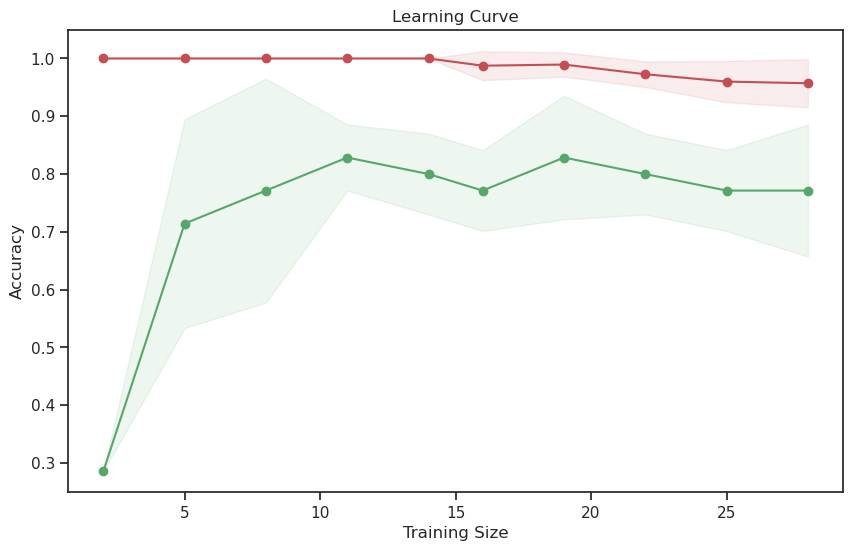

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, roc_auc_score)
from sklearn import tree
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


X=X_df
X_df.head()

targetVar=2

if targetVar==0:
    Y_group=data["group"] 
    targetnames=['Y','O']
    y=Y_group
if targetVar==1:
    Y_group=data["JND_group"] 
    targetnames=['0','1']   
    y=Y_JND
if targetVar==2:
    Y_group=labels_CC
    targetnames=['0','1']   
    y=Y_group
# Load the iris dataset as an example



Xscaled_df.head()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

param_grid = {'max_depth': [2,3,4 ,5, None],'splitter': ['best', 'random'],'criterion': ['gini', 'entropy'],"min_samples_split": [3,4,5]}

# Initialize the DecisionTreeClassifier and GridSearchCV
tree_clf = DecisionTreeClassifier(random_state=42)

grid_search = HalvingGridSearchCV(tree_clf, param_grid,random_state=42,factor=3, cv=5).fit(X_train, y_train)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best estimator on the test data
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot the best decision tree
plt.figure(figsize=(10, 5))
plot_tree(best_estimator, filled=True, feature_names=X_df.columns, class_names=targetnames, rounded=True)
plt.show()
best_estimator


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(3, 3))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_estimator, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")


### **DECISION TREE LEARNING CURVE**


from sklearn.model_selection import learning_curve, train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
#clf = DecisionTreeClassifier(random_state=42)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')

